<a href="https://colab.research.google.com/github/moshimoshisama/Expedia_Analysis/blob/main/4_statistical_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


This notebook focus on some statistical and graphical analysis based on our sampled top 3 countries data.

# **Part I: Data Readin & merge**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# read all sampled data
top10 = pd.read_csv("/content/drive/MyDrive/expedia/source/top1_0_data.csv",sep=",")
top11 = pd.read_csv("/content/drive/MyDrive/expedia/source/top1_1_sample_data.csv",sep=",")
top21 = pd.read_csv("/content/drive/MyDrive/expedia/source/top2_1_sample.csv",sep=",")
top20 = pd.read_csv("/content/drive/MyDrive/expedia/source/top2_0_sample_data.csv",sep=",")
top3 = pd.read_csv("/content/drive/MyDrive/expedia/source/top3_sample.csv",sep=",")

In [4]:
top_list = [top10,top11,top21,top20,top3]

In [5]:
# concat as one dataframe
top_all = pd.concat(top_list)

In [6]:
amenities = pd.read_csv("drive/MyDrive/expedia/source/amenities.tsv",sep="\t")

In [7]:
# merge with amenities dataset
top_all_merge = top_all.merge(amenities,on=['prop_id'], how='left')

In [18]:
# number of sampled data group by is_clicked
top_all_merge['is_clicked'].value_counts()

1    802820
0    738343
Name: is_clicked, dtype: int64

In [19]:
# number of sampled data group by is_trans
top_all_merge['is_trans'].value_counts()

0    1466079
1      75084
Name: is_trans, dtype: int64

In [59]:
# data features with data types
top_all_merge.dtypes

user_id                       object
search_id                     object
search_timestamp              object
point_of_sale                  int64
geo_location_country           int64
is_mobile                      int64
destination_id                 int64
checkin_date                  object
checkout_date                 object
adult_count                    int64
child_count                    int64
infant_count                   int64
room_count                     int64
sort_type                     object
applied_filters               object
impressions                   object
year_month                    object
year                         float64
month                        float64
rank                           int64
prop_id                        int64
is_travel_ad                   int64
review_rating                float64
review_count                 float64
star_rating                  float64
is_free_cancellation           int64
is_drr                         int64
p

# **Part II: Statistical & Graphical Analysis related to click through and transaction**

Analysis over all sampled data

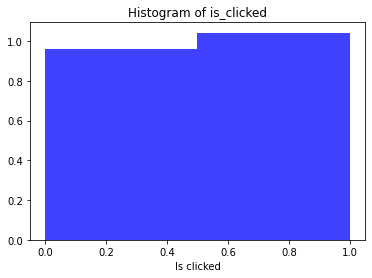

In [54]:
# histogram of is_clicked, left reps 0, right reps 1
import matplotlib.pyplot as plt
n, bins, patches = plt.hist(top_all_merge.is_clicked, 2, density = 1, facecolor='blue', alpha=0.75)
plt.xlabel('Is clicked')
plt.title('Histogram of is_clicked')
plt.show();

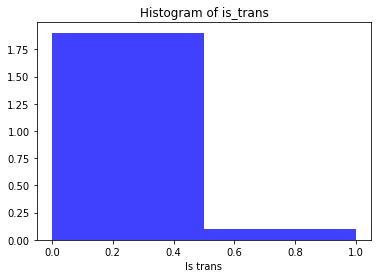

In [55]:
# histogram of is_trans, left reps 0, right reps 1
import matplotlib.pyplot as plt
n, bins, patches = plt.hist(top_all_merge.is_trans, 2, density = 1, facecolor='blue', alpha=0.75)
plt.xlabel('Is trans')
plt.title('Histogram of is_trans')
plt.show();

In [25]:
# mean values group by is_clicked
top_all_merge.groupby('is_clicked').mean()

,point_of_sale,geo_location_country,is_mobile,destination_id,adult_count,child_count,infant_count,room_count,year,month,...,HighSpeedInternet,HotTub,LaundryFacility,Parking,PetsAllowed,PrivatePool,SpaServices,SwimmingPool,WasherDryer,WiFi
is_clicked,,,,,,,,,,,,,,,,,,,,,
0,2.383679,1.241495,0.453647,2434.151901,2.016120,0.252705,0.001073,1.003448,2021.036959,7.168132,...,0.187708,0.195951,0.599492,0.244177,0.368489,0.020281,0.146863,0.409344,0.059680,0.062592
1,2.319039,1.179410,0.445052,2717.578345,2.176747,0.273262,0.000215,1.000366,2021.033554,7.233269,...,0.240987,0.234044,0.754881,0.313922,0.422924,0.006459,0.207452,0.475022,0.030909,0.092638


In [26]:
# mean values group by is_trans
top_all_merge.groupby('is_trans').mean()

,point_of_sale,geo_location_country,is_mobile,destination_id,adult_count,child_count,infant_count,room_count,year,month,...,HighSpeedInternet,HotTub,LaundryFacility,Parking,PetsAllowed,PrivatePool,SpaServices,SwimmingPool,WasherDryer,WiFi
is_trans,,,,,,,,,,,,,,,,,,,,,
0,2.371881,1.213375,0.450102,2595.706197,2.104835,0.265375,0.000585,1.001852,2021.035419,7.207338,...,0.213068,0.215360,0.675097,0.277723,0.394499,0.013472,0.178917,0.442383,0.045496,0.077293
1,1.922900,1.126738,0.430971,2310.144891,2.001358,0.225121,0.001438,1.001665,2021.030619,7.099076,...,0.278955,0.237731,0.835451,0.357216,0.459889,0.000827,0.191547,0.489167,0.019412,0.106713


In [27]:
# correlations with is_clicked
is_clicked_corr = top_all_merge.corr()['is_clicked']
print (is_clicked_corr.sort_values(ascending= False))

is_clicked                   1.000000
num_clicks                   0.888125
is_trans                     0.216117
LaundryFacility              0.166497
is_free_cancellation         0.160679
Bar                          0.139675
review_rating                0.138689
Gym                          0.138455
FreeWiFi                     0.128511
is_drr                       0.117359
is_travel_ad                 0.109303
review_count                 0.099561
adult_count                  0.082280
FreeParking                  0.080383
SpaServices                  0.078677
Parking                      0.077267
FreeBreakfast                0.066795
SwimmingPool                 0.065872
HighSpeedInternet            0.064479
WiFi                         0.055578
PetsAllowed                  0.055431
HotTub                       0.046097
FreeAirportTransportation    0.021661
destination_id               0.021448
month                        0.021344
child_count                  0.013595
star_rating 

In [28]:
# correlations with is_trans
is_trans_corr = top_all_merge.corr()['is_trans']
print (is_trans_corr.sort_values(ascending= False))

is_trans                     1.000000
is_clicked                   0.216117
num_clicks                   0.200151
LaundryFacility              0.076261
is_drr                       0.067914
Gym                          0.066305
review_count                 0.062195
is_free_cancellation         0.052237
FreeWiFi                     0.042811
Bar                          0.039749
Parking                      0.039089
review_rating                0.036329
HighSpeedInternet            0.035392
FreeBreakfast                0.035309
FreeParking                  0.030728
PetsAllowed                  0.029555
FreeAirportTransportation    0.029093
WiFi                         0.024155
SwimmingPool                 0.020827
is_travel_ad                 0.015359
HotTub                       0.012016
SpaServices                  0.007279
infant_count                 0.007193
prop_id                      0.002724
room_count                  -0.000848
year                        -0.005609
is_mobile   

In [29]:
# count numbers group by is_trans
trans_group = top_all_merge.groupby('is_trans')
trans_group.count()

,user_id,search_id,search_timestamp,point_of_sale,geo_location_country,is_mobile,destination_id,checkin_date,checkout_date,adult_count,...,HighSpeedInternet,HotTub,LaundryFacility,Parking,PetsAllowed,PrivatePool,SpaServices,SwimmingPool,WasherDryer,WiFi
is_trans,,,,,,,,,,,,,,,,,,,,,
0,1466079,1466079,1466079,1466079,1466079,1466079,1466079,1466071,1466071,1466079,...,1378527,1378527,1378527,1378527,1378527,1378527,1378527,1378527,1378527,1378527
1,75084,75084,75084,75084,75084,75084,75084,75084,75084,75084,...,75005,75005,75005,75005,75005,75005,75005,75005,75005,75005


In [30]:
# count numbers group by is_trans
clicked_group = top_all_merge.groupby('is_clicked')
clicked_group.describe()

point_of_sale                                                 \
                   count      mean       std  min  25%  50%  75%    max   
is_clicked                                                                
0               738343.0  2.383679  4.533798  1.0  1.0  1.0  2.0  134.0   
1               802820.0  2.319039  5.022609  1.0  1.0  1.0  2.0  116.0   

           geo_location_country            ... WasherDryer           WiFi  \
                          count      mean  ...         75%  max     count   
is_clicked                                 ...                              
0                      738343.0  1.241495  ...         0.0  1.0  668916.0   
1                      802820.0  1.179410  ...         0.0  1.0  784616.0   

                                                         
                mean       std  min  25%  50%  75%  max  
is_clicked                                               
0           0.062592  0.242228  0.0  0.0  0.0  0.0  1.0  
1           0.092638  0.289924  0.0  0.0  0.0  0.0  1.0  

[2 rows x 312 columns]

Analysis within positive click through instances

In [57]:
# only looked at clicked data, since the non-clicked data is sampled that the distribution could be unaccuracy.
clicked = top_all_merge[top_all_merge['is_clicked'] == True]
booked = top_all_merge[top_all_merge['is_trans'] == True]

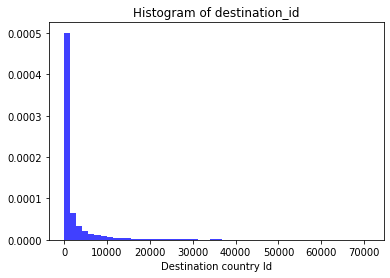

In [45]:
# histogram of destination id within positive click through instances
import matplotlib.pyplot as plt
n, bins, patches = plt.hist(clicked.destination_id, 50, density = 1, facecolor='blue', alpha=0.75)
plt.xlabel('Destination country Id')
plt.title('Histogram of destination_id')
plt.show();

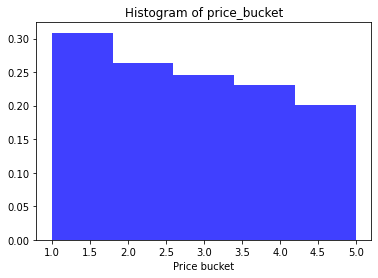

In [50]:
# histogram of price bucket within positive click through instances
import matplotlib.pyplot as plt
n, bins, patches = plt.hist(clicked.price_bucket, 5, density = 1, facecolor='blue', alpha=0.75)
plt.xlabel('Price bucket')
plt.title('Histogram of price_bucket')
plt.show();

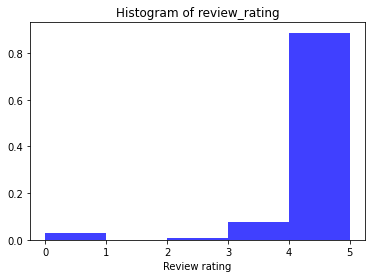

In [52]:
# histogram of review rating within positive click through instances
import matplotlib.pyplot as plt
n, bins, patches = plt.hist(clicked.review_rating, 5, density = 1, facecolor='blue', alpha=0.75)
plt.xlabel('Review rating')
plt.title('Histogram of review_rating')
plt.show();

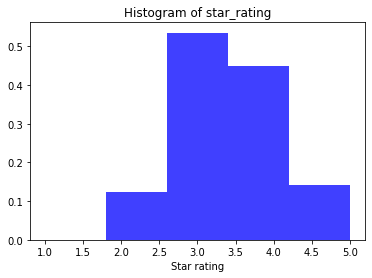

In [53]:
# histogram of star rating within positive click through instances
import matplotlib.pyplot as plt
n, bins, patches = plt.hist(clicked.star_rating, 5, density = 1, facecolor='blue', alpha=0.75)
plt.xlabel('Star rating')
plt.title('Histogram of star_rating')
plt.show();

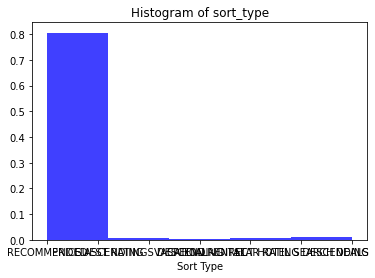

In [70]:
# histogram of sort type within positive click through instances, recommend is the most frequent
import matplotlib.pyplot as plt
n, bins, patches = plt.hist(clicked.sort_type, 5, density = 1, facecolor='blue', alpha=0.75)
plt.xlabel('Sort Type')
plt.title('Histogram of sort_type')
plt.show();

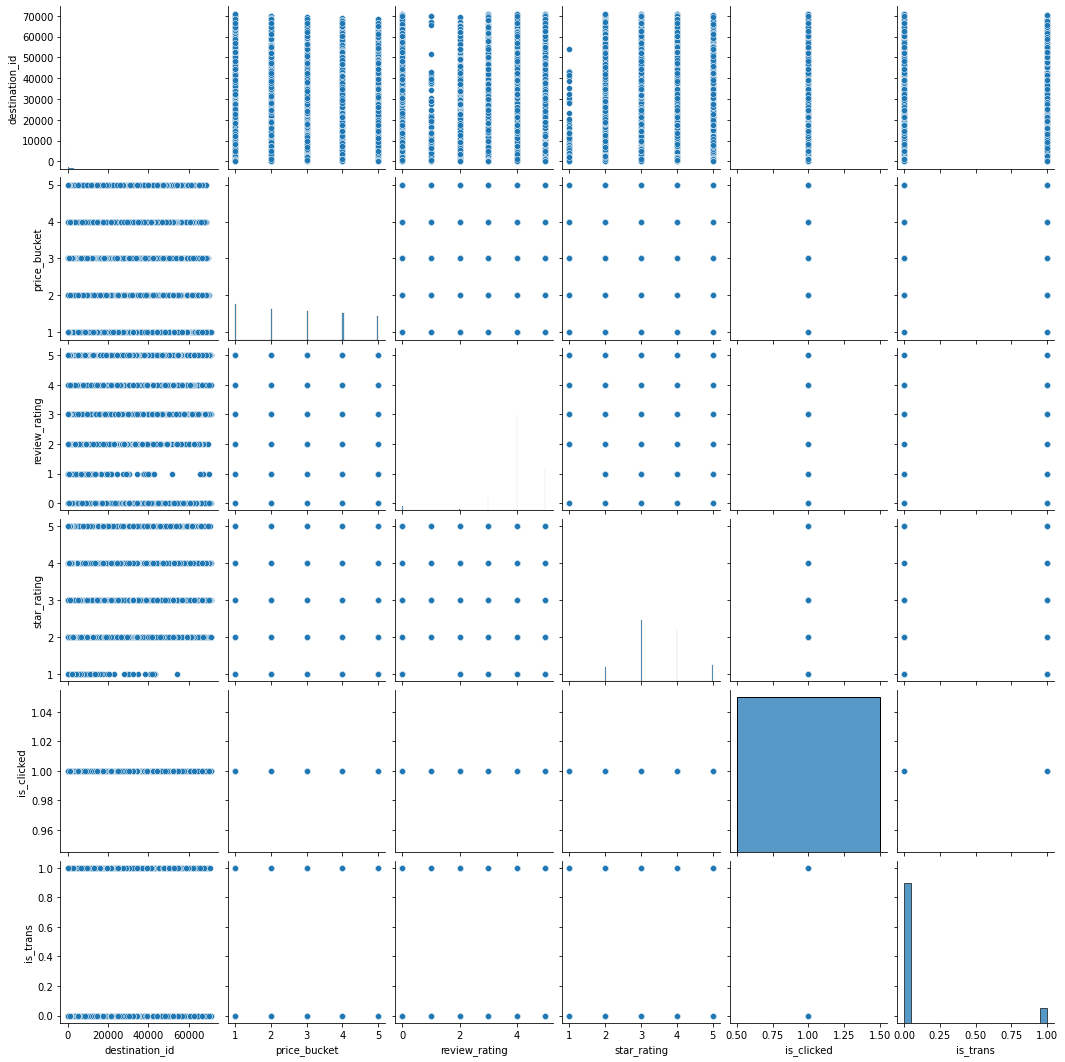

In [46]:
# seaborns pair grid summarizing variable pairs based on selected categorical data
data_cata = clicked[['destination_id','price_bucket','review_rating','star_rating','is_clicked','is_trans']]
print (sb.pairplot(data_cata))

In [47]:
# mean values group by destination id
price_bucket_groups = data_cata.groupby(clicked['destination_id'])
print (price_bucket_groups.mean())

                destination_id  price_bucket  review_rating  star_rating  \
destination_id                                                             
1                          1.0      2.927807       3.960195     3.348361   
2                          2.0      2.932010       4.052980     4.176211   
3                          3.0      3.040886       4.150799     4.366104   
4                          4.0      2.869258       4.043556     3.623566   
5                          5.0      2.817705       4.030318     3.513675   
...                        ...           ...            ...          ...   
70936                  70936.0           NaN       5.000000          NaN   
70958                  70958.0           NaN       4.000000     2.000000   
70985                  70985.0      1.000000       5.000000     4.000000   
70998                  70998.0           NaN       5.000000     4.000000   
71002                  71002.0      1.000000       4.000000     2.000000   

           

In [48]:
# describtions group by destination id
booking_group = data_cata.groupby('is_trans')
booking_group.describe()

destination_id                                                      \
                  count         mean          std  min   25%    50%     75%   
is_trans                                                                      
0              727887.0  2759.612228  7053.045630  1.0  79.0  385.0  1916.0   
1               74933.0  2309.268026  6285.389918  1.0  39.0  230.0  1395.0   

                  price_bucket            ... star_rating      is_clicked  \
              max        count      mean  ...         75%  max      count   
is_trans                                  ...                               
0         71002.0     685781.0  2.801569  ...         4.0  5.0   727887.0   
1         70364.0      70461.0  2.815898  ...         4.0  5.0    74933.0   

                                             
         mean  std  min  25%  50%  75%  max  
is_trans                                     
0         1.0  0.0  1.0  1.0  1.0  1.0  1.0  
1         1.0  0.0  1.0  1.0  1.0  1.0  1.0  

[2 rows x 40 columns]

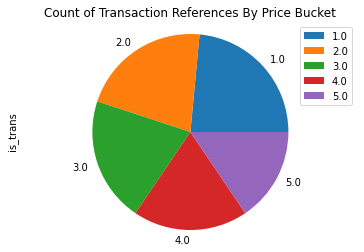

price_bucket
1.0    16594
2.0    15144
3.0    14526
4.0    13372
5.0    10967
Name: is_trans, dtype: int64


In [58]:
# count of transaction references By Price Bucket
count_trans_by_price_bucket = booked.groupby(['price_bucket'])['is_trans'].count()
count_trans_by_price_bucket.plot(kind='pie', title='Count of Transaction References By Price Bucket')
plt.axis('equal') 
plt.legend()
plt.show()
print (count_trans_by_price_bucket)

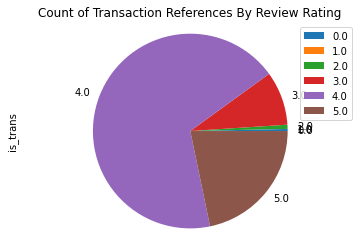

review_rating
0.0      258
1.0        6
2.0      518
3.0     6703
4.0    51180
5.0    16298
Name: is_trans, dtype: int64


In [72]:
# Count of Transaction References By Review Rating
count_trans_by_review_rating = booked.groupby(['review_rating'])['is_trans'].count()
count_trans_by_review_rating.plot(kind='pie', title='Count of Transaction References By Review Rating')
plt.axis('equal') 
plt.legend()
plt.show()
print (count_trans_by_review_rating)

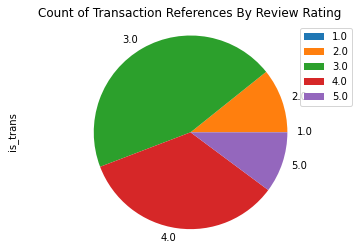

star_rating
1.0       17
2.0     7991
3.0    33597
4.0    25373
5.0     7586
Name: is_trans, dtype: int64


In [73]:
# Count of Transaction References By Review Rating
count_trans_by_star_rating = booked.groupby(['star_rating'])['is_trans'].count()
count_trans_by_star_rating.plot(kind='pie', title='Count of Transaction References By Review Rating')
plt.axis('equal') 
plt.legend()
plt.show()
print (count_trans_by_star_rating)

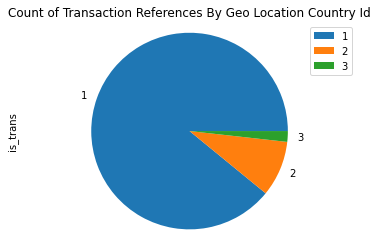

geo_location_country
1    66890
2     6872
3     1322
Name: is_trans, dtype: int64


In [75]:
# Count of Transaction References By Geo Location Country Id
count_trans_by_geo_location_country = booked.groupby(['geo_location_country'])['is_trans'].count()
count_trans_by_geo_location_country.plot(kind='pie', title='Count of Transaction References By Geo Location Country Id')
plt.axis('equal') 
plt.legend()
plt.show()
print (count_trans_by_geo_location_country)

AxesSubplot(0.125,0.125;0.62x0.755)


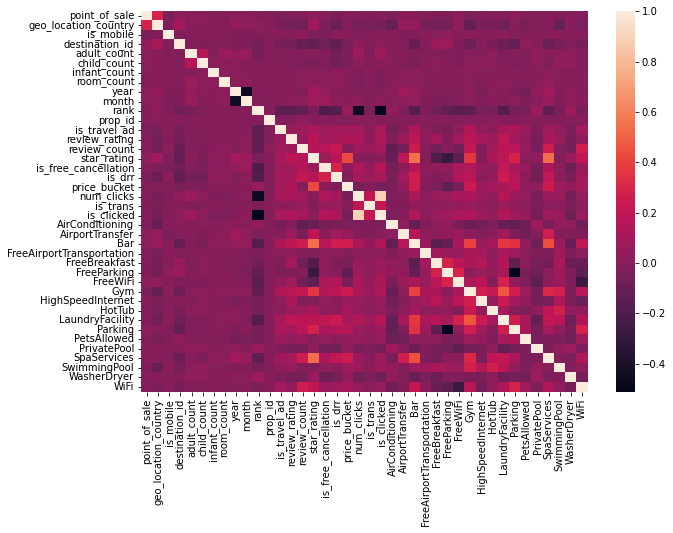

In [12]:
# Seaborn heatmap to visualize Pearson Correlation Coeffcient
fig, ax = plt.subplots(figsize=(10,7)) 
pearson_corr = top_all_merge.corr()
seaborn_corr = sb.heatmap(pearson_corr,xticklabels=pearson_corr.columns.values, yticklabels=pearson_corr.columns.values)
print(seaborn_corr)

                           point_of_sale  geo_location_country  is_mobile  \
point_of_sale                   1.000000              0.289978  -0.034379   
geo_location_country            0.289978              1.000000  -0.024720   
is_mobile                      -0.034379             -0.024720   1.000000   
destination_id                  0.031998              0.111303  -0.011330   
adult_count                     0.012333              0.005381  -0.012258   
child_count                     0.014075              0.007946   0.003885   
infant_count                    0.001251             -0.003389   0.007736   
room_count                     -0.004208             -0.008331  -0.002711   
year                            0.021440              0.038899  -0.018923   
month                           0.008849              0.022527  -0.024038   
rank                           -0.004400              0.023227  -0.006147   
prop_id                        -0.000687             -0.003276  -0.000697   

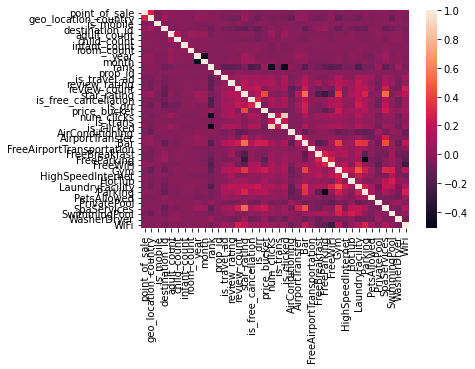

In [8]:
# use Seaborn heatmap to visualize Pearson Correlation Coefficient with values details
pearson_corr = top_all_merge.corr()
print(pearson_corr)
seaborn_corr = sb.heatmap(pearson_corr, xticklabels=pearson_corr.columns.values, yticklabels=pearson_corr.columns.values)
print(seaborn_corr)

In [80]:
# Create subset of boolean data
general_boolean_cols = top_all_merge[['is_mobile','is_travel_ad','is_free_cancellation','is_drr','AirConditioning','AirportTransfer','Bar','FreeAirportTransportation','FreeBreakfast','FreeParking',\
                        'FreeWiFi','Gym','HighSpeedInternet','HotTub','LaundryFacility','Parking','PetsAllowed','PrivatePool','SpaServices','SwimmingPool','WasherDryer','WiFi']]
clicked_boolean_cols = clicked[['is_mobile','is_travel_ad','is_free_cancellation','is_drr','AirConditioning','AirportTransfer','Bar','FreeAirportTransportation','FreeBreakfast','FreeParking',\
                        'FreeWiFi','Gym','HighSpeedInternet','HotTub','LaundryFacility','Parking','PetsAllowed','PrivatePool','SpaServices','SwimmingPool','WasherDryer','WiFi']]
booked_boolean_cols = booked[['is_mobile','is_travel_ad','is_free_cancellation','is_drr','AirConditioning','AirportTransfer','Bar','FreeAirportTransportation','FreeBreakfast','FreeParking',\
                        'FreeWiFi','Gym','HighSpeedInternet','HotTub','LaundryFacility','Parking','PetsAllowed','PrivatePool','SpaServices','SwimmingPool','WasherDryer','WiFi']]

In [81]:
# Calculate mean
print('----General-----')
print(general_boolean_cols.mean())
print('----Clicked-----')
print(clicked_boolean_cols.mean())
print('----Booked-----')
print(booked_boolean_cols.mean())

----General-----
is_mobile                    0.449170
is_travel_ad                 0.067648
is_free_cancellation         0.519256
is_drr                       0.443205
AirConditioning              0.450556
AirportTransfer              0.072095
Bar                          0.474827
FreeAirportTransportation    0.052465
FreeBreakfast                0.259121
FreeParking                  0.531248
FreeWiFi                     0.871005
Gym                          0.535737
HighSpeedInternet            0.216468
HotTub                       0.216514
LaundryFacility              0.683371
Parking                      0.281825
PetsAllowed                  0.397873
PrivatePool                  0.012820
SpaServices                  0.179569
SwimmingPool                 0.444797
WasherDryer                  0.044150
WiFi                         0.078811
dtype: float64
----Clicked-----
is_mobile                    0.445052
is_travel_ad                 0.093972
is_free_cancellation         0.596244
i

In [85]:
# Calculate Median
print('----General-----')
print(general_boolean_cols.median())
print('----Clicked-----')
print(clicked_boolean_cols.median())
print('----Booked-----')
print(booked_boolean_cols.median())

----General-----
is_mobile                    0.0
is_travel_ad                 0.0
is_free_cancellation         1.0
is_drr                       0.0
AirConditioning              0.0
AirportTransfer              0.0
Bar                          0.0
FreeAirportTransportation    0.0
FreeBreakfast                0.0
FreeParking                  1.0
FreeWiFi                     1.0
Gym                          1.0
HighSpeedInternet            0.0
HotTub                       0.0
LaundryFacility              1.0
Parking                      0.0
PetsAllowed                  0.0
PrivatePool                  0.0
SpaServices                  0.0
SwimmingPool                 0.0
WasherDryer                  0.0
WiFi                         0.0
dtype: float64
----Clicked-----
is_mobile                    0.0
is_travel_ad                 0.0
is_free_cancellation         1.0
is_drr                       0.0
AirConditioning              0.0
AirportTransfer              0.0
Bar                        

In [88]:
# calculate persentage for each features
for x in [general_boolean_cols,clicked_boolean_cols,booked_boolean_cols]:
  print('-----------------')
  for y in x: 
    count = x[y].value_counts()
    total = len(x)
    percent = count/total
    print(y)
    print(percent)
  print('-----------------')

-----------------
is_mobile
0    0.55083
1    0.44917
Name: is_mobile, dtype: float64
is_travel_ad
0    0.932352
1    0.067648
Name: is_travel_ad, dtype: float64
is_free_cancellation
1    0.519256
0    0.480744
Name: is_free_cancellation, dtype: float64
is_drr
0    0.556795
1    0.443205
Name: is_drr, dtype: float64
AirConditioning
0.0    0.518202
1.0    0.424938
Name: AirConditioning, dtype: float64
AirportTransfer
0.0    0.875144
1.0    0.067996
Name: AirportTransfer, dtype: float64
Bar
0.0    0.495312
1.0    0.447828
Name: Bar, dtype: float64
FreeAirportTransportation
0.0    0.893658
1.0    0.049482
Name: FreeAirportTransportation, dtype: float64
FreeBreakfast
0.0    0.698752
1.0    0.244388
Name: FreeBreakfast, dtype: float64
FreeParking
1.0    0.501041
0.0    0.442099
Name: FreeParking, dtype: float64
FreeWiFi
1.0    0.821479
0.0    0.121661
Name: FreeWiFi, dtype: float64
Gym
1.0    0.505275
0.0    0.437865
Name: Gym, dtype: float64
HighSpeedInternet
0.0    0.738980
1.0    0.20415

                           is_mobile  is_travel_ad  is_free_cancellation  \
is_mobile                   1.000000      0.000624             -0.076931   
is_travel_ad                0.000624      1.000000              0.035432   
is_free_cancellation       -0.076931      0.035432              1.000000   
is_drr                      0.038820      0.038224              0.194538   
AirConditioning             0.003105     -0.035555             -0.033643   
AirportTransfer            -0.022484     -0.006329              0.019512   
Bar                        -0.003960      0.083254              0.097540   
FreeAirportTransportation  -0.006365     -0.000611             -0.025150   
FreeBreakfast              -0.018360     -0.051332             -0.052662   
FreeParking                 0.009509     -0.056912             -0.033359   
FreeWiFi                   -0.003188     -0.037193             -0.047858   
Gym                        -0.006551      0.071653              0.039916   
HighSpeedInt

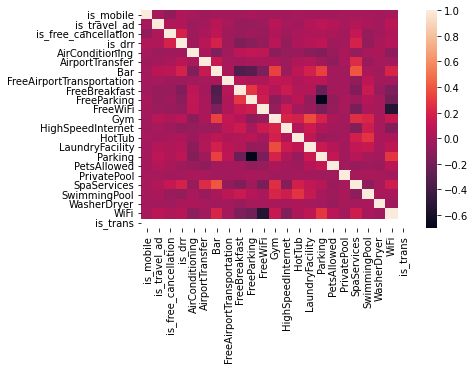

In [89]:
# For boolean subset in booked, use Seaborn heatmap to visualize Pearson Correlation Coefficient.
booked_boolean_cols = booked[['is_mobile','is_travel_ad','is_free_cancellation','is_drr','AirConditioning','AirportTransfer','Bar','FreeAirportTransportation','FreeBreakfast','FreeParking',\
                        'FreeWiFi','Gym','HighSpeedInternet','HotTub','LaundryFacility','Parking','PetsAllowed','PrivatePool','SpaServices','SwimmingPool','WasherDryer','WiFi','is_trans']]
pearson_corr = booked_boolean_cols.corr()
print(pearson_corr)
seaborn_corr = sb.heatmap(pearson_corr, xticklabels=pearson_corr.columns.values, yticklabels=pearson_corr.columns.values)
print(seaborn_corr)

                           is_mobile  is_travel_ad  is_free_cancellation  \
is_mobile                   1.000000      0.016921             -0.040664   
is_travel_ad                0.016921      1.000000              0.052076   
is_free_cancellation       -0.040664      0.052076              1.000000   
is_drr                      0.043992      0.082187              0.168496   
AirConditioning             0.005259     -0.046131             -0.043251   
AirportTransfer            -0.022650     -0.000746              0.002572   
Bar                        -0.002902      0.126931              0.100048   
FreeAirportTransportation   0.006635      0.011970             -0.005985   
FreeBreakfast               0.005200     -0.039452             -0.019503   
FreeParking                 0.038972     -0.062885             -0.022193   
FreeWiFi                    0.014478     -0.002243              0.022470   
Gym                         0.010574      0.125173              0.085676   
HighSpeedInt

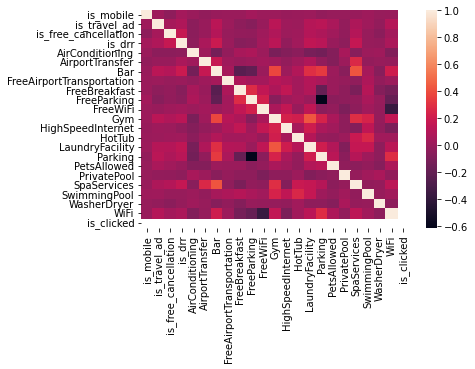

In [90]:
# For boolean subset in clicked, use Seaborn heatmap to visualize Pearson Correlation Coefficient.
clicked_boolean_cols = clicked[['is_mobile','is_travel_ad','is_free_cancellation','is_drr','AirConditioning','AirportTransfer','Bar','FreeAirportTransportation','FreeBreakfast','FreeParking',\
                        'FreeWiFi','Gym','HighSpeedInternet','HotTub','LaundryFacility','Parking','PetsAllowed','PrivatePool','SpaServices','SwimmingPool','WasherDryer','WiFi','is_clicked']]
pearson_corr = clicked_boolean_cols.corr()
print(pearson_corr)
seaborn_corr = sb.heatmap(pearson_corr, xticklabels=pearson_corr.columns.values, yticklabels=pearson_corr.columns.values)
print(seaborn_corr)